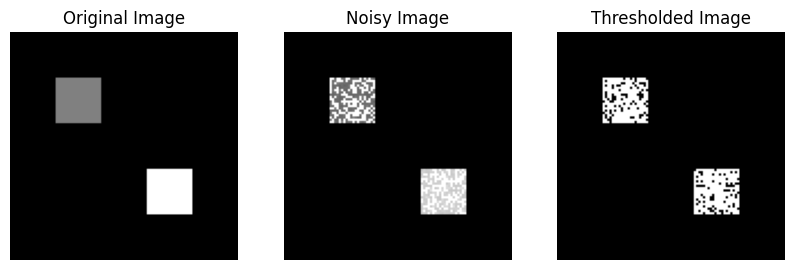

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def otsu_threshold(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()

    cdf = hist.cumsum()

    mean = np.arange(256) * hist
    cumulative_mean = mean.cumsum()

    variance = np.zeros(256)
    for i in range(1, 256):
        p1 = cdf[i]
        p2 = 1 - p1
        if p1 == 0 or p2 == 0:
            continue
        mu1 = cumulative_mean[i]
        mu2 = cumulative_mean[-1] - mu1
        variance[i] = p1 * p2 * ((mu1 - mu2) ** 2)

    optimal_threshold = np.argmax(variance)

    _, thresholded = cv2.threshold(image, optimal_threshold, 255, cv2.THRESH_BINARY)

    return thresholded

image = np.zeros((100, 100), dtype=np.uint8)
image[20:40, 20:40] = 100  # First object
image[60:80, 60:80] = 200  # Second object

noise = np.random.normal(0, 10, (100, 100)).astype(np.uint8)
noisy_image = image.copy()
noisy_image[20:40, 20:40] = cv2.add(image[20:40, 20:40], noise[20:40, 20:40])
noisy_image[60:80, 60:80] = cv2.add(image[60:80, 60:80], noise[60:80, 60:80])

thresholded_image = noisy_image.copy()
thresholded_image[20:40, 20:40] = otsu_threshold(noisy_image[20:40, 20:40])
thresholded_image[60:80, 60:80] = otsu_threshold(noisy_image[60:80, 60:80])

plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(image, seeds, threshold):
    height, width = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image)
    stack = []

    image = image.astype(np.float32)

    for seed in seeds:
        stack.append(seed)

    while len(stack) > 0:
        current_point = stack.pop()
        y, x = current_point

        if visited[y, x] == 1:
            continue

        visited[y, x] = 1

        if abs(image[y, x] - image[seeds[0][0], seeds[0][1]]) <= threshold:
            segmented[y, x] = 255

            if y - 1 >= 0:
                stack.append((y - 1, x))
            if y + 1 < height:
                stack.append((y + 1, x))
            if x - 1 >= 0:
                stack.append((y, x - 1))
            if x + 1 < width:
                stack.append((y, x + 1))

    return segmented

if __name__ == "__main__":
    color_image = cv2.imread('larry.webp')
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    seeds = [(30, 30)] 

    threshold = 50 

    segmented_image = region_growing(gray_image, seeds, threshold)

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(122)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.show()

[ WARN:0@41.304] global loadsave.cpp:248 findDecoder imread_('image1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
